 binning and binarization concepts in simple terms:

1. **Binning**:

   Binning is the process of grouping values into "bins" or categories based on their numerical values. It's like putting data into different buckets or containers. Binning is commonly used to simplify complex data and reduce its granularity, making it easier to understand and analyze.

   - **Unsupervised Binning**: In unsupervised binning, the grouping of values into bins is done without using any external labels or information. This means the algorithm decides on the bins based solely on the values themselves.
     - **Types**:
       - **KMeans Binning**: Similar to the KMeans clustering algorithm, this method groups values into bins based on their similarity or proximity to cluster centroids.
       - **Uniform Binning**: This method divides the range of values into equal-width bins, regardless of the distribution of the data.
          **banifits**: outliers handle and also not change in sprad of data
          
          **formula**:   max - min / number of bins
          
          **Example**:
          65,70,72,75,78,80,82,85,88,90,92,95,98,100
          
          min = 65 | max = 100 | number of bins=5
          
          put in formula:
          100-65 / 5 = 7
          
          Bin 1: 65 - 71
          Bin 2: 72 - 78
          Bin 3: 79 - 85
          Bin 4: 86 - 92
          Bin 5: 93 - 100
          
          
         -**Quantile Binning**: 
       
           Quantile binning divides the data into bins such that each bin contains approximately the same number of data points. It ensures that each bin represents a similar proportion of the dataset.
       
         this is bather then other because they hanadle outliers and also build spread of vlues unform 
         -Each interval contains 10% of total observations 
       

   - **Supervised Binning**: In supervised binning, the grouping of values into bins is based on external labels or information. This means that the bins are determined with the help of some target variable or labels.
   
     -**Custom Binning**: Custom binning involves manually specifying the boundaries of the bins based on domain knowledge or specific requirements. It allows for more flexibility and customization in defining the bins.

2. **Binarization**:

   Binarization is the process of converting numerical data into binary (0 or 1) values based on a certain threshold. It's like making a decision based on a cutoff point. Binarization is commonly used to transform continuous variables into categorical variables, where values above the threshold are assigned one category, and values below the threshold are assigned another category.

   Binarization is straightforward: if a value is greater than or equal to the threshold, it's assigned a value of 1; otherwise, it's assigned a value of 0.

Both binning and binarization are useful techniques for data preprocessing, allowing for the simplification, discretization, and transformation of data to make it more suitable for analysis or modeling.

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [16]:
df = pd.read_csv('/kaggle/input/titanic-train-csv/train.csv',usecols=['Age','Fare','Survived'])

In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(714, 3)

In [21]:

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [23]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [24]:
clf = DecisionTreeClassifier()

In [25]:
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Accuracy is this :', accuracy_score(y_test,y_pred))

Accuracy is this : 0.6223776223776224


In [26]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6289319248826291

In [27]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [28]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [29]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [32]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [34]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [35]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [36]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
54,65.0,14.0,61.9792,12.0,"(54.0, 80.0]","(51.479, 76.292]"
657,32.0,9.0,15.5000,7.0,"(30.0, 32.0]","(14.454, 18.75]"
623,21.0,4.0,7.8542,2.0,"(19.0, 21.0]","(7.775, 7.896]"
220,16.0,2.0,8.0500,3.0,"(6.0, 16.0]","(7.896, 8.158]"
600,24.0,5.0,27.0000,10.0,"(23.0, 25.0]","(26.55, 31.275]"


In [37]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [38]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6359154929577464

In [39]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6303208137715179


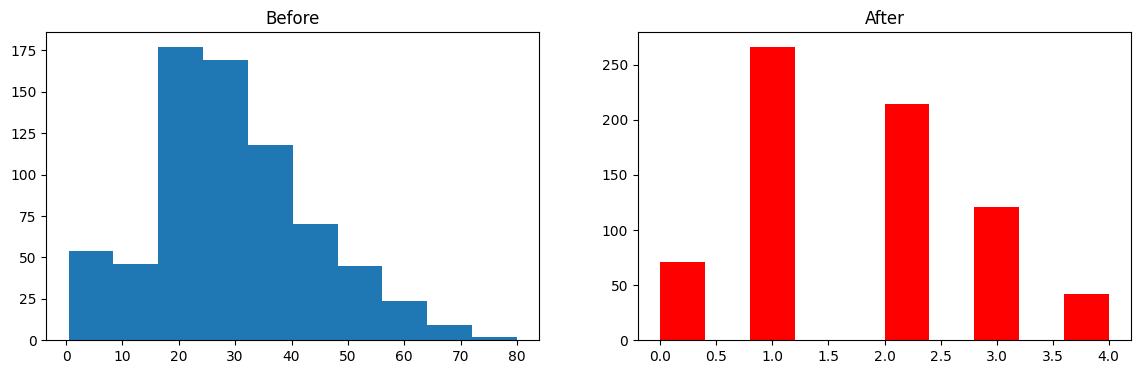

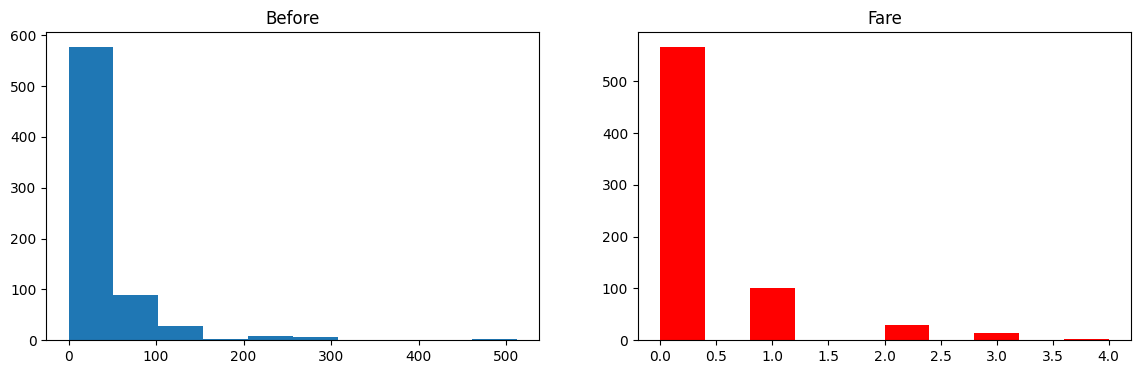

In [40]:
discretize(5,'kmeans')

0.6275430359937403


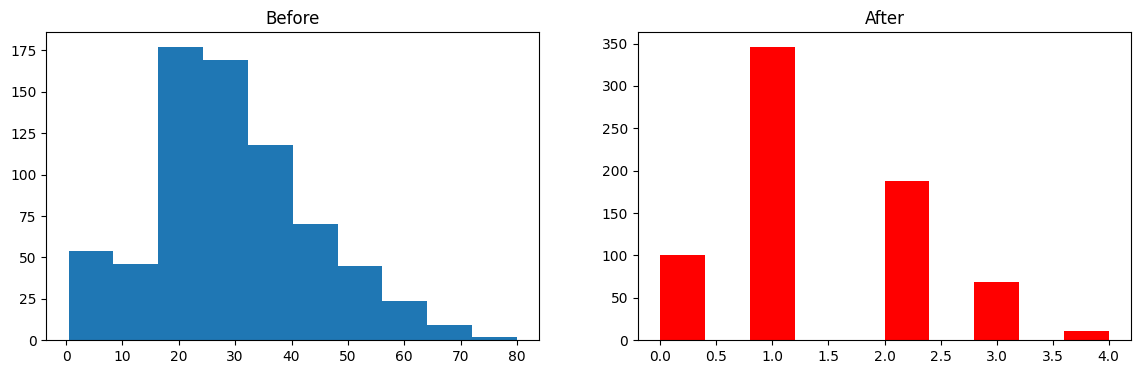

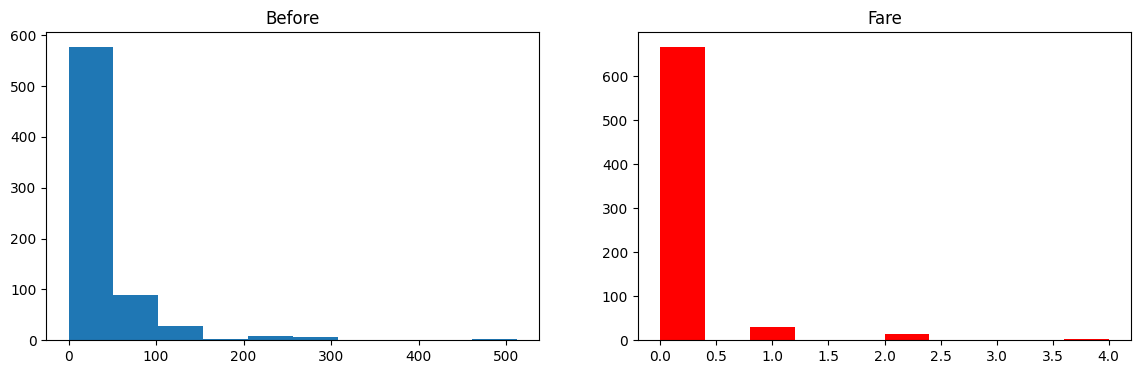

In [41]:
discretize(5,'uniform')

# Applying Binarization

In [54]:



from sklearn.preprocessing import Binarizer

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [43]:
df = pd.read_csv('/kaggle/input/titanic-train-csv/train.csv')[['Age','Fare','SibSp','Parch','Survived']]


In [44]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [45]:
df.dropna(inplace=True)

In [46]:

df['family'] = df['SibSp'] + df['Parch']

In [47]:
df.sample(2)

,Age,Fare,SibSp,Parch,Survived,family
404,20.0,8.6625,0,0,0,0
874,28.0,24.0000,1,0,1,1


In [48]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [49]:
df.sample(2)

,Age,Fare,Survived,family
308,30.0,24.0000,0,1
477,29.0,7.0458,0,1


In [50]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [52]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [53]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6541079812206572

In [55]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [56]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [57]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [58]:

clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6223776223776224

In [59]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6304186228482003